In [96]:
import os
import pandas as pd


path = "C:\\Users\\jh\\anaconda\\esaa\\archive"  
os.chdir(path) 

In [97]:
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [98]:
#파일을 각각 KRvideos , USvideos 로 넣었습니다. 

input_fd = open('KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
KRvideos = pd.read_csv(input_fd)

input_fd = open('USvideos.csv', errors = 'backslashreplace',encoding='utf-8')
USvideos = pd.read_csv(input_fd)

In [99]:
KRvideos.isnull().sum() #주요 데이터에 null은 없음

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

In [100]:
KRvideos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [101]:
#데이터 타입 변경
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    KRvideos[column] = KRvideos[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    KRvideos[column] = KRvideos[column].astype(str)

In [102]:
USvideos.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [103]:
KRvideos.describe()

,views,likes,dislikes,comment_count
count,3.456700e+04,3.456700e+04,3.456700e+04,3.456700e+04
mean,4.249473e+05,1.218642e+04,5.390980e+02,2.025383e+03
std,2.430637e+06,1.170531e+05,1.370852e+04,2.150677e+04
min,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.776850e+04,4.120000e+02,2.100000e+01,1.050000e+02
50%,1.114960e+05,1.389000e+03,6.500000e+01,3.450000e+02
75%,2.788665e+05,3.704500e+03,1.750000e+02,9.290000e+02
max,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


날짜변수 처리

In [104]:
USvideos['trending_date'] = pd.to_datetime(USvideos['trending_date'],errors='coerce', format='%y.%d.%m')
USvideos['publish_time'] = pd.to_datetime(USvideos['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
USvideos['publish_datetime'] = pd.to_datetime(USvideos['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')


USvideos = USvideos[USvideos['trending_date'].notnull()]
USvideos = USvideos[USvideos['publish_time'].notnull()]

USvideos = USvideos.dropna(how='any',inplace=False, axis = 0)

USvideos.insert(5, 'publish_date', USvideos['publish_time'].dt.date)
USvideos['publish_time'] = USvideos['publish_time'].dt.time


USvideos = USvideos.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')

In [105]:
KRvideos['trending_date'] = pd.to_datetime(KRvideos['trending_date'],errors='coerce', format='%y.%d.%m')
KRvideos['publish_time'] = pd.to_datetime(KRvideos['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
KRvideos['publish_datetime'] = pd.to_datetime(KRvideos['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')


KRvideos = KRvideos[KRvideos['trending_date'].notnull()]
KRvideos = KRvideos[KRvideos['publish_time'].notnull()]

KRvideos = KRvideos.dropna(how='any',inplace=False, axis = 0)

KRvideos.insert(5, 'publish_date', KRvideos['publish_time'].dt.date)
KRvideos['publish_time'] = KRvideos['publish_time'].dt.time


KRvideos = KRvideos.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')

카테고리 변수 처리

In [106]:
KRvideos['category_id'] = KRvideos['category_id'].astype(str)


category_id = {}

with open('KR_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']



KRvideos.insert(4, 'category', KRvideos['category_id'].map(category_id))

category_list = KRvideos['category'].unique()
category_list


array(['Sports', nan, 'People & Blogs', 'Gaming', 'News & Politics',
       'Entertainment', 'Music', 'Film & Animation', 'Travel & Events',
       'Comedy', 'Pets & Animals', 'Science & Technology', 'Shows',
       'Education', 'Autos & Vehicles', 'Howto & Style', 'Trailers'],
      dtype=object)

In [107]:
category_list = KRvideos['category'].unique()
print(category_list)
print(pd.Series(KRvideos['category_id']).value_counts())
pd.Series(KRvideos['category']).value_counts()

#데이터에는 29가 있는데 카테고리 아이디에는 29가 없음 nan으로 처리됨

['Sports' nan 'People & Blogs' 'Gaming' 'News & Politics' 'Entertainment'
 'Music' 'Film & Animation' 'Travel & Events' 'Comedy' 'Pets & Animals'
 'Science & Technology' 'Shows' 'Education' 'Autos & Vehicles'
 'Howto & Style' 'Trailers']
24    3839
25    3272
22    2748
23     791
1      785
10     757
20     579
17     439
15     293
26     244
27     217
29     118
43      73
2       60
28      41
19      37
44       1
Name: category_id, dtype: int64


Entertainment           3839
News & Politics         3272
People & Blogs          2748
Comedy                   791
Film & Animation         785
Music                    757
Gaming                   579
Sports                   439
Pets & Animals           293
Howto & Style            244
Education                217
Shows                     73
Autos & Vehicles          60
Science & Technology      41
Travel & Events           37
Trailers                   1
Name: category, dtype: int64

In [108]:
id_to_category = {}

with open('KR_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category 


{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [109]:
USvideos['category_id'] =USvideos['category_id'].astype(str)


category_id = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']


USvideos.insert(4, 'category',USvideos['category_id'].map(category_id))

category_list =USvideos['category'].unique()
category_list


array(['Music', 'Entertainment', 'Howto & Style', 'Comedy',
       'People & Blogs', 'News & Politics', 'Sports', 'Autos & Vehicles',
       'Science & Technology', 'Education', 'Pets & Animals',
       'Film & Animation', 'Gaming', 'Travel & Events',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [110]:
id_to_category = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

요일변수 처리

In [111]:
t = ['월','화','수','목','금','토','일']
import time
KRvideos.insert(2, 'trending_date_wd', KRvideos['trending_date'].dt.day_name())
KRvideos.insert(7, 'publish_date_wd', KRvideos['publish_datetime'].dt.day_name())


In [112]:
t = ['월','화','수','목','금','토','일']
import time
USvideos.insert(2, 'trending_date_wd', USvideos['trending_date'].dt.day_name())
USvideos.insert(7, 'publish_date_wd', USvideos['publish_datetime'].dt.day_name())


In [113]:
USvideos.head()

,index,trending_date,trending_date_wd,title,channel_title,category,category_id,publish_date_wd,publish_date,publish_time,...,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_datetime
video_id,,,,,,,,,,,,,,,,,,,,,
5x1FAiIq_pQ,136,2017-11-14,Tuesday,Alicia Keys - When You Were Gone,Alicia Keys,Music,10,Thursday,2017-11-09,15:49:21,...,95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,Find out more in The Vault: http://bit.ly/AK_A...,2017-11-09 15:49:21
htvR_dBs3eg,127,2017-11-14,Tuesday,Sam Smith - The Thrill of It All ALBUM REVIEW,theneedledrop,Music,10,Friday,2017-11-10,21:38:57,...,98422,2926,106,798,https://i.ytimg.com/vi/htvR_dBs3eg/default.jpg,False,False,False,Listen: https://www.youtube.com/watch?v=J_ub7E...,2017-11-10 21:38:57
vd4zwINEcLY,139,2017-11-14,Tuesday,Live in the now!,poofables,Entertainment,24,Sunday,2011-03-27,04:31:25,...,95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never affo...",2011-03-27 04:31:25
7fm7mll2qvg,140,2017-11-14,Tuesday,Sigrid - Strangers (Lyric Video),SigridVEVO,Music,10,Friday,2017-11-10,00:00:00,...,91776,4604,46,357,https://i.ytimg.com/vi/7fm7mll2qvg/default.jpg,False,False,False,Listen to Strangers here: https://Sigrid.lnk.t...,2017-11-10 00:00:00
q-WipZ9p0wk,143,2017-11-14,Tuesday,Three meals that cost me $1.50 each,Brothers Green Eats,Howto & Style,26,Thursday,2017-11-09,14:00:08,...,77630,1991,83,208,https://i.ytimg.com/vi/q-WipZ9p0wk/default.jpg,False,False,False,Welcome to day three of cooking for the price ...,2017-11-09 14:00:08


In [114]:
KRvideos.head()

,index,trending_date,trending_date_wd,title,channel_title,category,category_id,publish_date_wd,publish_date,publish_time,...,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_datetime
video_id,,,,,,,,,,,,,,,,,,,,,
iDdElhzVx_c,120,2017-11-14,Tuesday,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!,맨유튜브,Sports,17,Friday,2017-11-10,15:08:47,...,467546,542,83,899,https://i.ytimg.com/vi/iDdElhzVx_c/default.jpg,False,False,False,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!\n\n...,2017-11-10 15:08:47
Svkg904ASjk,121,2017-11-14,Tuesday,유기성목사 요한계시록 강해 08. 속히 미지근한 신앙에서 벗어나야 합니다!,예수바라기,NaN,29,Sunday,2017-11-12,09:55:03,...,9628,123,11,8,https://i.ytimg.com/vi/Svkg904ASjk/default.jpg,False,False,False,2017-11-12\n요한계시록 3: 14-22(새번역)\n14.라오디게아 교회의 ...,2017-11-12 09:55:03
F03qkeDeCOo,122,2017-11-14,Tuesday,💗품바여왕 버드리💗관객박수호응 100점 최고 멋진 공연 2017년11월11일 사천...,금강산,People & Blogs,22,Saturday,2017-11-11,17:12:03,...,62823,261,50,80,https://i.ytimg.com/vi/F03qkeDeCOo/default.jpg,False,False,False,$2017 사천 국제 로타리 클럽 초청 공연$\n 품바-버드리님\n * 품바사...,2017-11-11 17:12:03
xHkxALq6q7A,123,2017-11-14,Tuesday,고양이랑 숨바꼭질?! 숨어버린 [우리 고양이가 어디갔지] !!!,HeopopGames 허팝게임,Gaming,20,Friday,2017-11-10,03:50:58,...,82438,409,72,98,https://i.ytimg.com/vi/xHkxALq6q7A/default.jpg,False,False,False,숨바꼭질?! ㅋㅋㅋ이런 형태의 게임이 계속해서 출시되는군요 ㅋㅋㅋ,2017-11-10 03:50:58
HfHlzm1buvE,124,2017-11-14,Tuesday,국격박살 문재앙 - 가는 곳마다 뻘짓,높바람,News & Politics,25,Friday,2017-11-10,16:53:10,...,148370,1782,1788,1612,https://i.ytimg.com/vi/HfHlzm1buvE/default.jpg,False,False,False,"#문재인, 인도네시아 국빈 방문 하이라이트",2017-11-10 16:53:10


In [115]:
USvideos.insert(0, 'country','US')

In [116]:
KRvideos.insert(0, 'country','KR')

In [117]:
KRUSdt = pd.concat([KRvideos, USvideos])

In [118]:
KRUSdt.head()

,country,index,trending_date,trending_date_wd,title,channel_title,category,category_id,publish_date_wd,publish_date,...,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_datetime
video_id,,,,,,,,,,,,,,,,,,,,,
iDdElhzVx_c,KR,120,2017-11-14,Tuesday,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!,맨유튜브,Sports,17,Friday,2017-11-10,...,467546,542,83,899,https://i.ytimg.com/vi/iDdElhzVx_c/default.jpg,False,False,False,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!\n\n...,2017-11-10 15:08:47
Svkg904ASjk,KR,121,2017-11-14,Tuesday,유기성목사 요한계시록 강해 08. 속히 미지근한 신앙에서 벗어나야 합니다!,예수바라기,NaN,29,Sunday,2017-11-12,...,9628,123,11,8,https://i.ytimg.com/vi/Svkg904ASjk/default.jpg,False,False,False,2017-11-12\n요한계시록 3: 14-22(새번역)\n14.라오디게아 교회의 ...,2017-11-12 09:55:03
F03qkeDeCOo,KR,122,2017-11-14,Tuesday,💗품바여왕 버드리💗관객박수호응 100점 최고 멋진 공연 2017년11월11일 사천...,금강산,People & Blogs,22,Saturday,2017-11-11,...,62823,261,50,80,https://i.ytimg.com/vi/F03qkeDeCOo/default.jpg,False,False,False,$2017 사천 국제 로타리 클럽 초청 공연$\n 품바-버드리님\n * 품바사...,2017-11-11 17:12:03
xHkxALq6q7A,KR,123,2017-11-14,Tuesday,고양이랑 숨바꼭질?! 숨어버린 [우리 고양이가 어디갔지] !!!,HeopopGames 허팝게임,Gaming,20,Friday,2017-11-10,...,82438,409,72,98,https://i.ytimg.com/vi/xHkxALq6q7A/default.jpg,False,False,False,숨바꼭질?! ㅋㅋㅋ이런 형태의 게임이 계속해서 출시되는군요 ㅋㅋㅋ,2017-11-10 03:50:58
HfHlzm1buvE,KR,124,2017-11-14,Tuesday,국격박살 문재앙 - 가는 곳마다 뻘짓,높바람,News & Politics,25,Friday,2017-11-10,...,148370,1782,1788,1612,https://i.ytimg.com/vi/HfHlzm1buvE/default.jpg,False,False,False,"#문재인, 인도네시아 국빈 방문 하이라이트",2017-11-10 16:53:10


In [119]:
KRUSdt.to_csv('dt.csv',encoding='utf-8')

In [120]:
my_df = KRUSdt

# 분석

In [121]:
num_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = KRUSdt[num_columns].corr()
corr_matrix
#조회수와 좋아요수의 상관관계가 높은 것으로 보인다. 

,views,likes,dislikes,comment_count
views,1.000000,0.823353,0.538445,0.651963
likes,0.823353,1.000000,0.467752,0.851368
dislikes,0.538445,0.467752,1.000000,0.603870
comment_count,0.651963,0.851368,0.603870,1.000000


In [122]:
print("미국 데이터 개수: ", USvideos['index'].count())

print("한국 데이터 개수: ",KRvideos['index'].count())

미국 데이터 개수:  6254
한국 데이터 개수:  14294


Text(0.5, 1.0, 'Catogories of trend videos in KOREA')

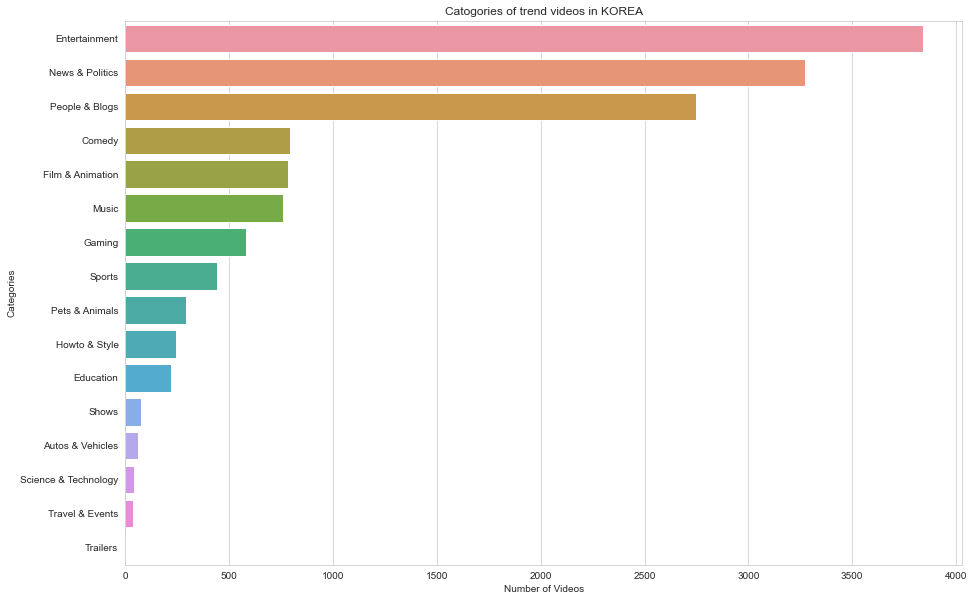

In [123]:
#한국
#카테고리별 트렌드영상 개수 비교

cat_df_kr = my_df[my_df['country']=='KR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_kr['index'],x=cat_df_kr['category'], data=cat_df_kr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in KOREA")
#총 14294 개의 데이터 중에 약 4000개가 엔터테인먼트로 인기가 가장 많았고 약 3250개가 뉴스,정치관련 영상이었습니다.

Text(0.5, 1.0, 'Catogories of trend videos in United States')

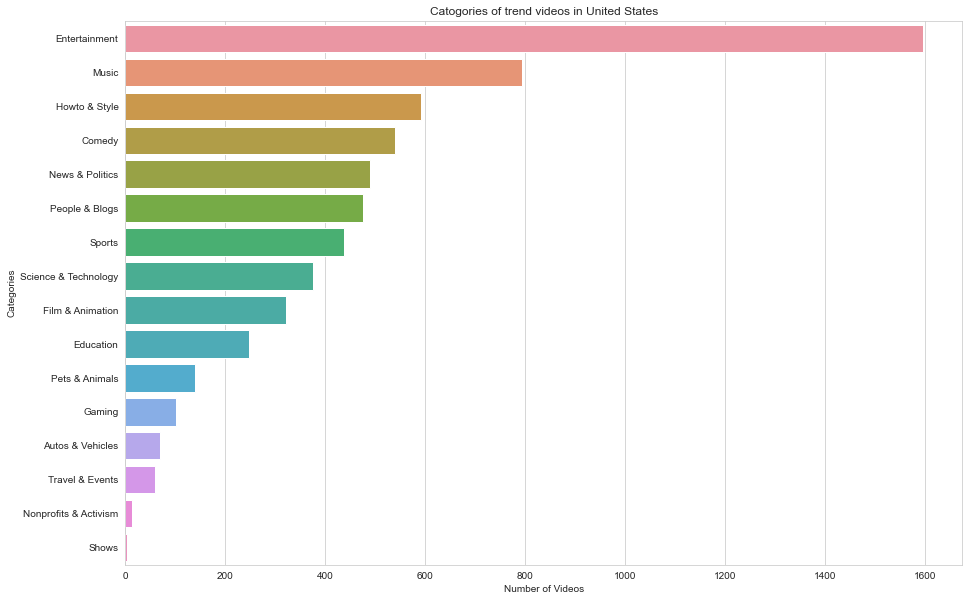

In [124]:
#미국
#카테고리별 트렌드영상 개수 비교
cat_df_us = my_df[my_df['country'] == 'US']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['category'], data=cat_df_us,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in United States")
#총 6254개의 데이터 중에 약 1600 엔터테인먼트로 인기가 가장 많았고 약 800개가 음악관련 영상이었습니다.

한국과 미국에서 눈에 띄게 보이는 차이는
일단 미국과 한국의 데이터크기가 많이 차이가 났고,
미국의 경유 음악 카테고리가 2위를 차지한 것에 비해 한국에서는 낮은 순위를 보였고
한국에서 정치관련 영상이 2위를 차지한 것에 비해 미국에서는 낮은 순위를 보였다.

각 영상이 트렌드 영상에 얼마나 오래 머물렀는가(얼마동안이나 인기있었는가) 

In [125]:
my_df = KRUSdt
my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')
publish_to_trend = {}
my_df_first = my_df_full.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
diff_first = (my_df_first['trending_date']).astype('datetime64[ns]')-my_df_first['publish_date'].astype('datetime64[ns]')

diff_first = diff_first.reset_index()
diff_first.columns = ['video_id','publish_to_trend']


my_df_last = my_df
diff_last = my_df['trending_date'].astype('datetime64[ns]')-my_df['publish_date'].astype('datetime64[ns]')
diff_last = diff_last.reset_index()
diff_last.columns = ['video_id','publish_to_trend_last']
my_df = my_df.reset_index()
my_df.insert(4,'publish_to_trend_last', diff_last['publish_to_trend_last'].astype('timedelta64[D]').astype(int))
my_df.insert(4, 'trend_duration', 0)
my_df = pd.merge(my_df, diff_first, left_on='video_id', right_on='video_id', how='left')
my_df["publish_to_trend"] = my_df["publish_to_trend"].astype('timedelta64[D]').astype(int)


my_df['trend_duration'] = (my_df['publish_to_trend_last']-my_df['publish_to_trend'])+1
my_df.set_index('video_id')[['publish_to_trend','trend_duration']].sort_values('trend_duration',ascending=False).head()

,publish_to_trend,trend_duration
video_id,,
M4ZoCHID9GI,3,30
iILJvqrAQ_w,1,29
i5qOzqD9Rms,3,29
r-3iathMo7o,1,29
tjA7nAHOAww,2,28


In [126]:
my_df

,video_id,country,index,trending_date,trend_duration,publish_to_trend_last,trending_date_wd,title,channel_title,category,...,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_datetime,publish_to_trend
0,iDdElhzVx_c,KR,120,2017-11-14,1,4,Tuesday,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!,맨유튜브,Sports,...,542,83,899,https://i.ytimg.com/vi/iDdElhzVx_c/default.jpg,False,False,False,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!\n\n...,2017-11-10 15:08:47,4
1,Svkg904ASjk,KR,121,2017-11-14,1,2,Tuesday,유기성목사 요한계시록 강해 08. 속히 미지근한 신앙에서 벗어나야 합니다!,예수바라기,NaN,...,123,11,8,https://i.ytimg.com/vi/Svkg904ASjk/default.jpg,False,False,False,2017-11-12\n요한계시록 3: 14-22(새번역)\n14.라오디게아 교회의 ...,2017-11-12 09:55:03,2
2,F03qkeDeCOo,KR,122,2017-11-14,1,3,Tuesday,💗품바여왕 버드리💗관객박수호응 100점 최고 멋진 공연 2017년11월11일 사천...,금강산,People & Blogs,...,261,50,80,https://i.ytimg.com/vi/F03qkeDeCOo/default.jpg,False,False,False,$2017 사천 국제 로타리 클럽 초청 공연$\n 품바-버드리님\n * 품바사...,2017-11-11 17:12:03,3
3,xHkxALq6q7A,KR,123,2017-11-14,1,4,Tuesday,고양이랑 숨바꼭질?! 숨어버린 [우리 고양이가 어디갔지] !!!,HeopopGames 허팝게임,Gaming,...,409,72,98,https://i.ytimg.com/vi/xHkxALq6q7A/default.jpg,False,False,False,숨바꼭질?! ㅋㅋㅋ이런 형태의 게임이 계속해서 출시되는군요 ㅋㅋㅋ,2017-11-10 03:50:58,4
4,HfHlzm1buvE,KR,124,2017-11-14,1,4,Tuesday,국격박살 문재앙 - 가는 곳마다 뻘짓,높바람,News & Politics,...,1782,1788,1612,https://i.ytimg.com/vi/HfHlzm1buvE/default.jpg,False,False,False,"#문재인, 인도네시아 국빈 방문 하이라이트",2017-11-10 16:53:10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,1HLMi1s6Tho,US,40818,2018-06-14,1,8,Thursday,there's something we've been hiding from you.,CaseyNeistat,People & Blogs,...,136888,3318,17004,https://i.ytimg.com/vi/1HLMi1s6Tho/default.jpg,False,False,False,go say congrats to the girl - https://www.inst...,2018-06-06 19:35:08,8
20544,NB3gWkhLkxM,US,40819,2018-06-14,1,8,Thursday,The Internet - Come Over (Official Video),TheInternetVEVO,Music,...,92403,1856,4572,https://i.ytimg.com/vi/NB3gWkhLkxM/default.jpg,False,False,False,The Internet's Come Over is taken from the new...,2018-06-06 14:00:02,8
20545,T9UHD30MSGk,US,40820,2018-06-14,1,8,Thursday,Knife Expert Guesses Cheap vs. Expensive Knive...,Epicurious,Howto & Style,...,11427,2305,2504,https://i.ytimg.com/vi/T9UHD30MSGk/default.jpg,False,False,False,Epicurious challenges knife expert Geoff Feder...,2018-06-06 18:54:38,8
20546,4wIBCoxuOJ0,US,40810,2018-06-14,1,7,Thursday,How one scientist averted a national health cr...,TED-Ed,Education,...,20551,738,1320,https://i.ytimg.com/vi/4wIBCoxuOJ0/default.jpg,False,False,False,TED wants to promote student ideas! Learn more...,2018-06-07 15:02:33,7


In [127]:
print(diff_first)
print(diff_last)

          video_id publish_to_trend
0      iDdElhzVx_c           4 days
1      fIQ2Ty2OL34           4 days
2      egXr0PU-kCY           6 days
3      BEweWXa5Twk           5 days
4      _w58R1OGQFA           5 days
...            ...              ...
20396  37HV_JW6HDM           2 days
20397  dSxV2yVkYHI           2 days
20398  sXunBBOu3gI           2 days
20399  yeizau0kW98           2 days
20400  ooyjaVdt-jA          28 days

[20401 rows x 2 columns]
          video_id publish_to_trend_last
0      iDdElhzVx_c                4 days
1      Svkg904ASjk                2 days
2      F03qkeDeCOo                3 days
3      xHkxALq6q7A                4 days
4      HfHlzm1buvE                4 days
...            ...                   ...
20543  1HLMi1s6Tho                8 days
20544  NB3gWkhLkxM                8 days
20545  T9UHD30MSGk                8 days
20546  4wIBCoxuOJ0                7 days
20547  ooyjaVdt-jA               28 days

[20548 rows x 2 columns]


In [128]:
#카테고리별로 트렌드에 머무른 기간 보기

Text(0.5, 1.0, 'Trending Duration for each category')

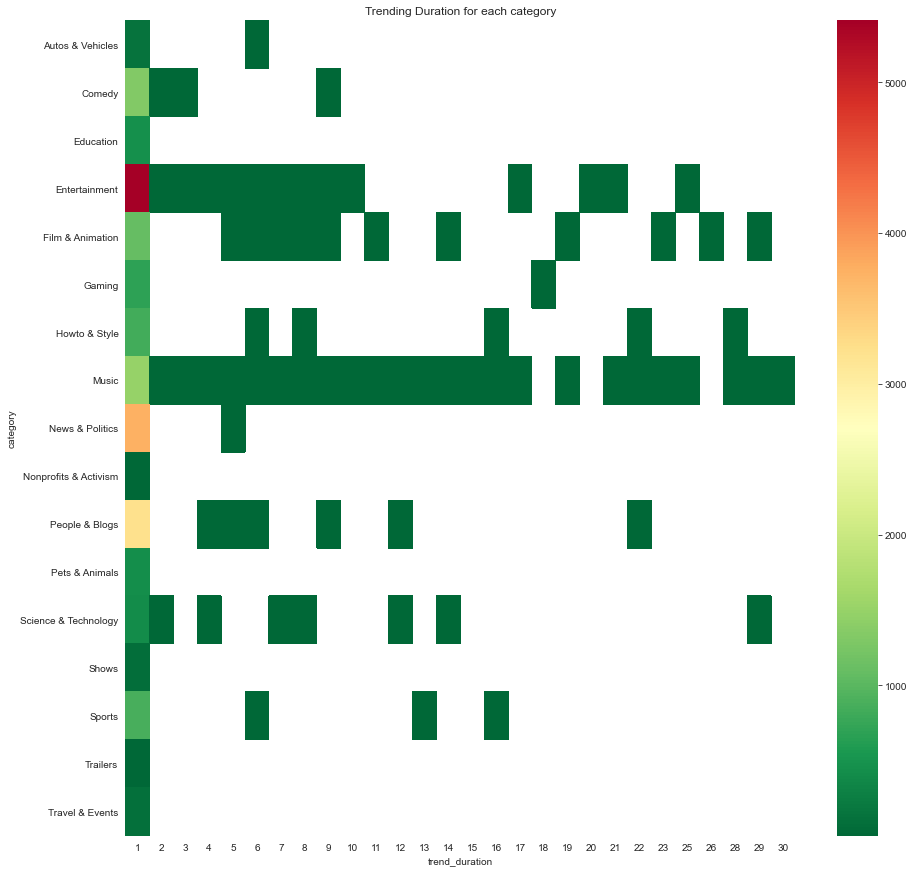

In [129]:
cat_trend_duration= my_df.groupby(['category','trend_duration']).count()['video_id'].unstack()
plt.figure(figsize=(15,15))
sns.heatmap(cat_trend_duration,cmap='RdYlGn_r')
plt.title("Trending Duration for each category")

Text(0.5, 1.0, 'US_Trending Duration for each category')

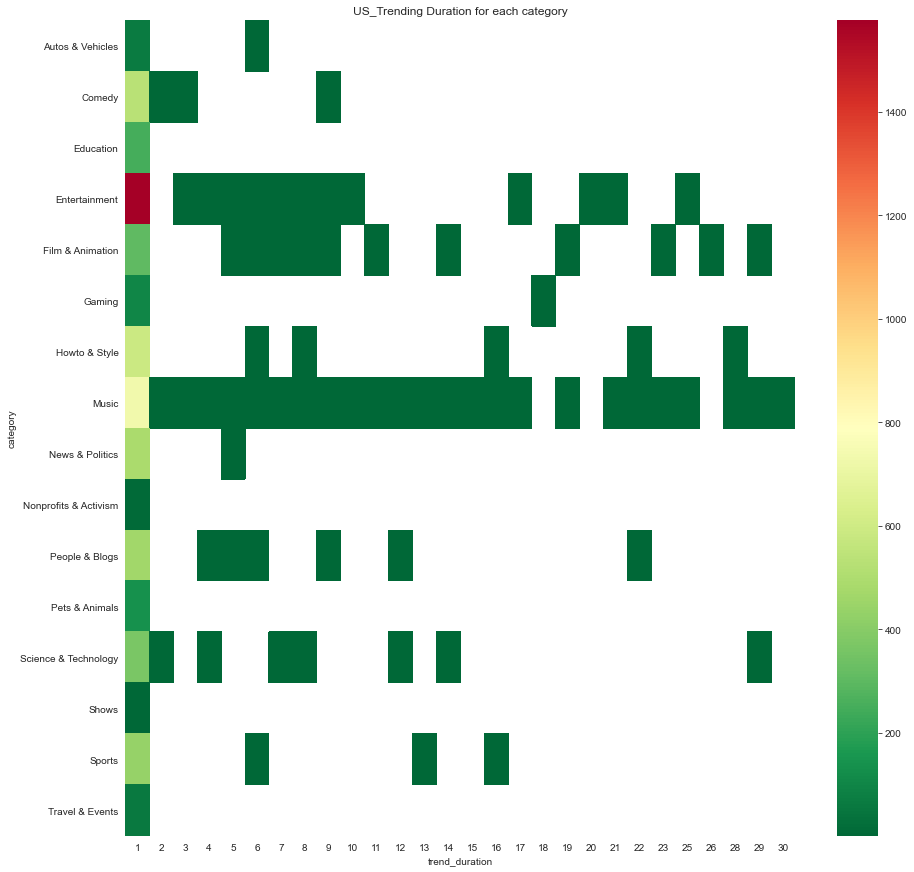

In [130]:
df_us = my_df[my_df['country'] == 'US']
cat_trend_duration_us= df_us.groupby(['category','trend_duration']).count()['video_id'].unstack()
plt.figure(figsize=(15,15))
sns.heatmap(cat_trend_duration_us,cmap='RdYlGn_r')
plt.title("US_Trending Duration for each category")

Text(0.5, 1.0, 'KR_Trending Duration for each category')

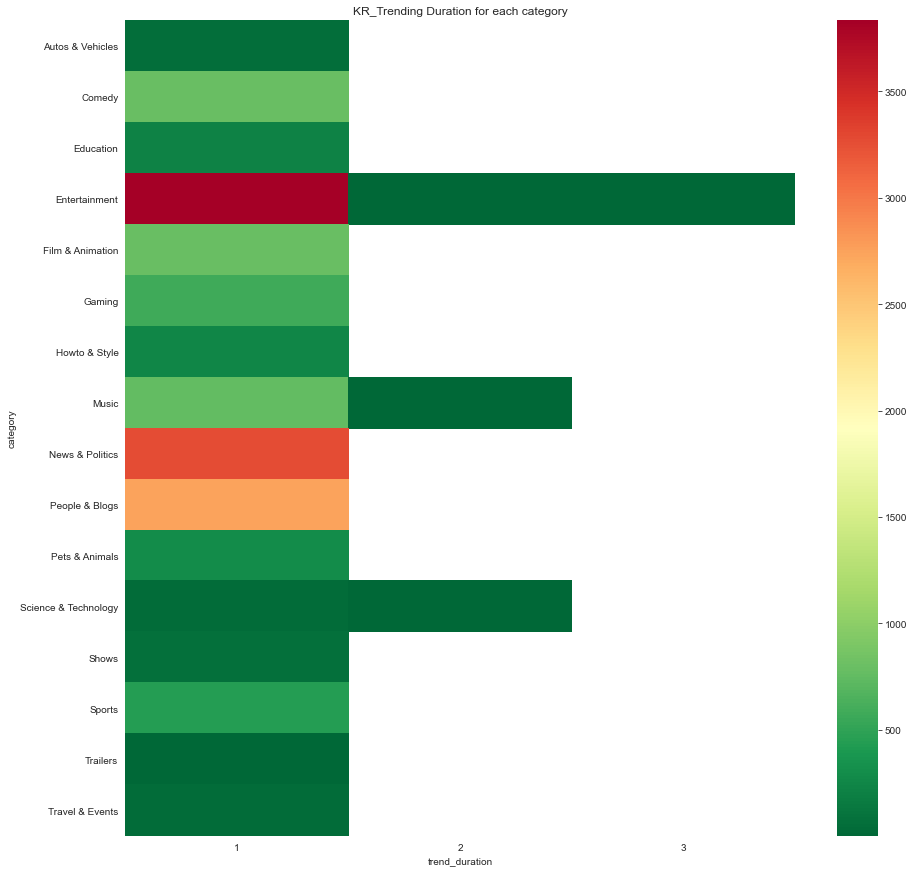

In [131]:
df_kr = my_df[my_df['country'] == 'KR']
cat_trend_duration_kr= df_kr.groupby(['category','trend_duration']).count()['video_id'].unstack()
plt.figure(figsize=(15,15))
sns.heatmap(cat_trend_duration_kr,cmap='RdYlGn_r')
plt.title("KR_Trending Duration for each category")

한국에서는 한 영상이 3일 이상 트렌드로 지속된 적이 없다. 충격적...!

In [132]:
#카테고리별 최고 조회수, 좋아요 수 비교  

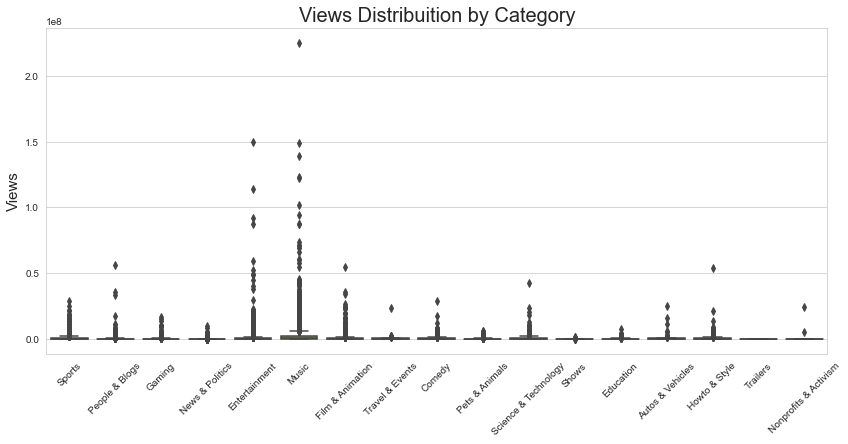

In [133]:
plt.figure(figsize = (14,6))

g1 = sns.boxplot(x='category', y='views', data=my_df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views", fontsize=15)
plt.show()
#너무 촘촘해서 알 수 없음

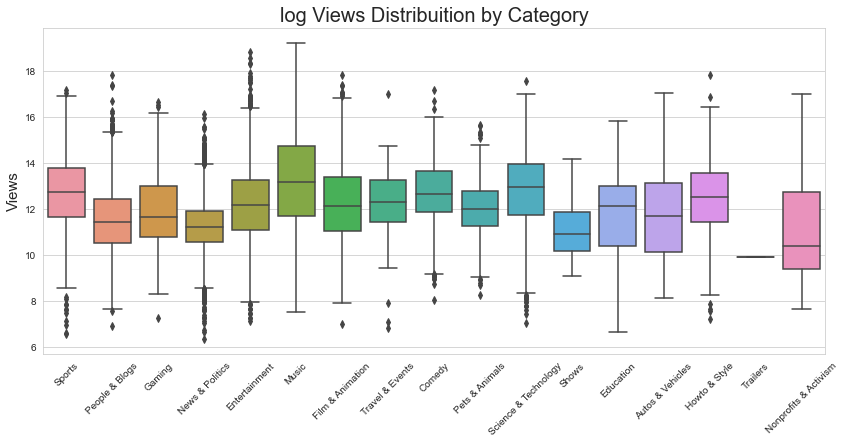

In [134]:
my_df['log_views'] = np.log(my_df['views'].astype('float64'))
plt.figure(figsize = (14,6))

g1 = sns.boxplot(x='category', y='log_views', data=my_df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("log Views Distribuition by Category", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views", fontsize=15)
plt.show()
#log변환 후 boxplot

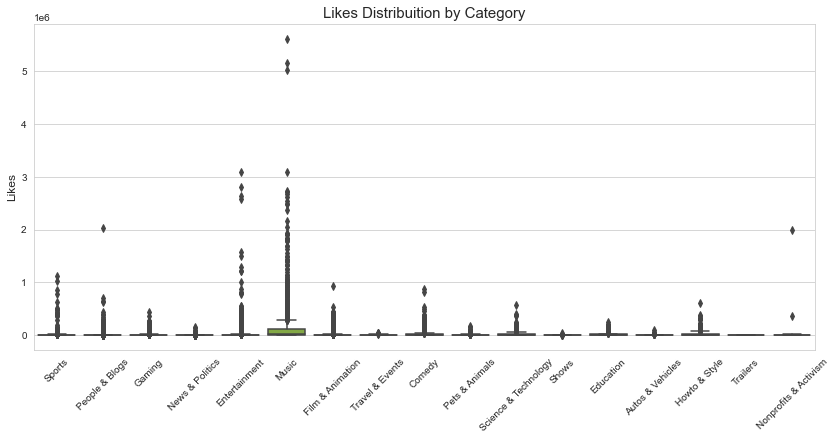

In [135]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category', y='likes', data=my_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes", fontsize=12)
plt.show()

C:\Users\jh\.conda\envs\anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


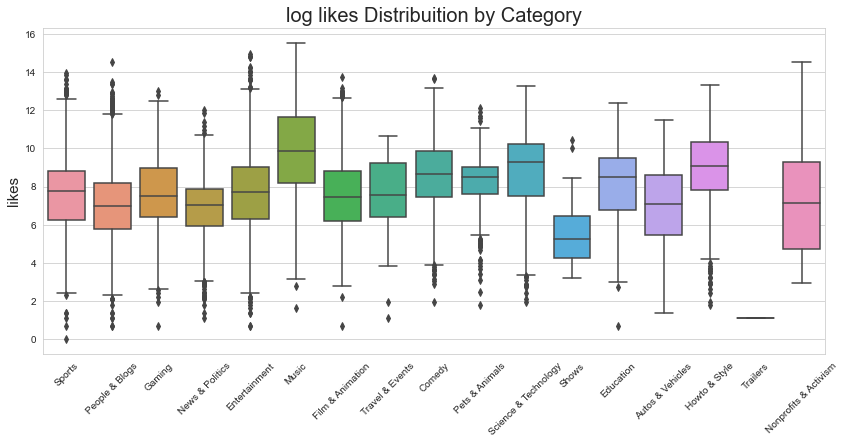

In [136]:
my_df['log_likes'] = np.log(my_df['likes'].astype('float64'))
plt.figure(figsize = (14,6))

g1 = sns.boxplot(x='category', y='log_likes', data=my_df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("log likes Distribuition by Category", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("likes", fontsize=15)
plt.show()
#log변환 후 boxplot

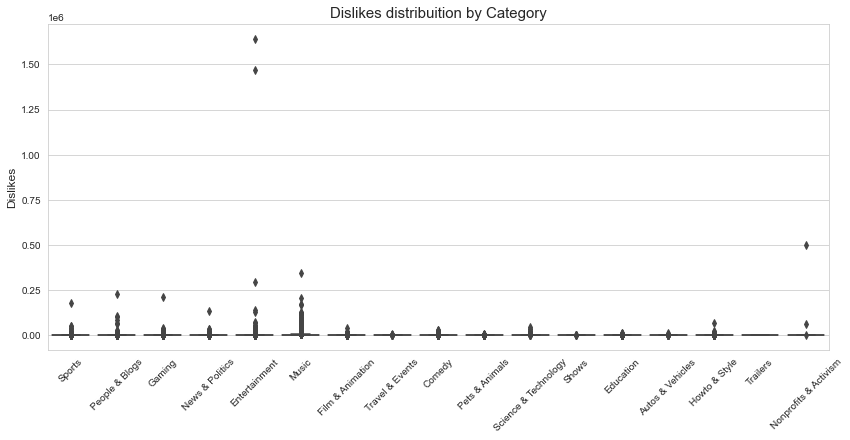

In [137]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category', y='dislikes', data=my_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes", fontsize=12)
plt.show()

C:\Users\jh\.conda\envs\anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jh\.conda\envs\anaconda\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


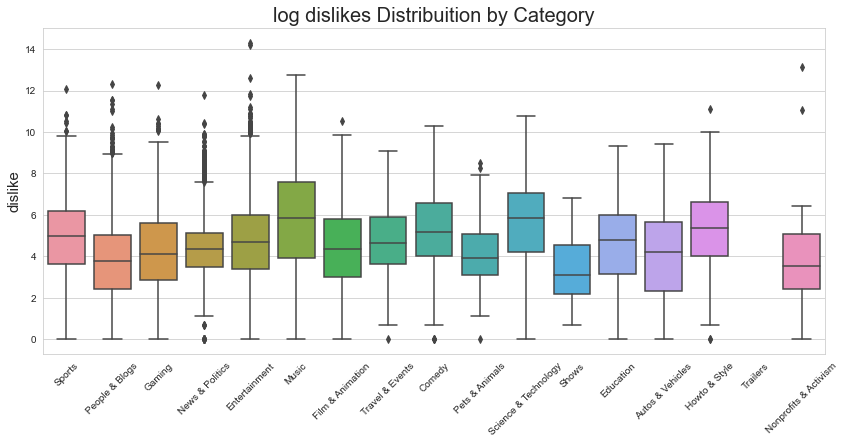

In [138]:
my_df['log_dislikes'] = np.log(my_df['dislikes'].astype('float64'))
plt.figure(figsize = (14,6))

g1 = sns.boxplot(x='category', y='log_dislikes', data=my_df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("log dislikes Distribuition by Category", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("dislike", fontsize=15)
plt.show()
#log변환 후 boxplot

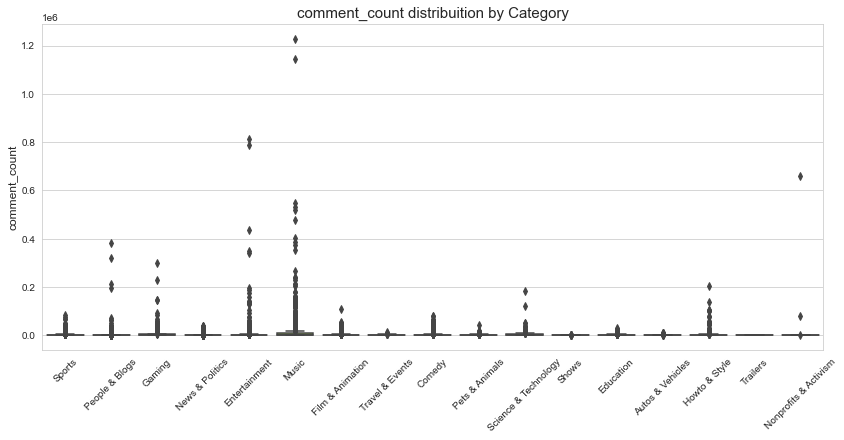

In [139]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category', y='comment_count', data=my_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("comment_count distribuition by Category", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("comment_count", fontsize=12)
plt.show()

C:\Users\jh\.conda\envs\anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


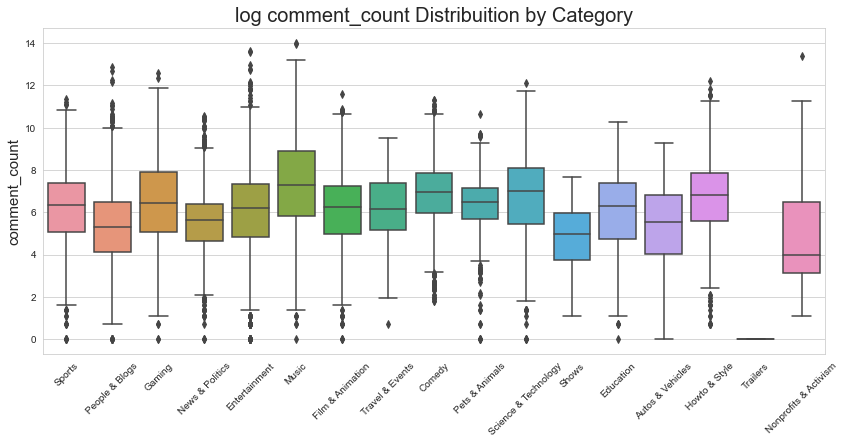

In [140]:
my_df['log_comment_count'] = np.log(my_df['comment_count'].astype('float64'))
plt.figure(figsize = (14,6))

g1 = sns.boxplot(x='category', y='log_comment_count', data=my_df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("log comment_count Distribuition by Category", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("comment_count", fontsize=15)
plt.show()
#log변환 후 boxplot

# 2. KRviedos의 조회수에 영향을 미치는 변수 분석

## 2-1. KR videos의 views, likes, dislikes,comment_count

### 한국 views 상위 5


In [141]:
KRvideos[["index", "country", "title", "channel_title", 
        "category", "views", "likes", "dislikes", 
        "comment_count", "publish_date"]].sort_values(by = ["views"], ascending = [False]).head()

,index,country,title,channel_title,category,views,likes,dislikes,comment_count,publish_date
video_id,,,,,,,,,,
FlsCjmMhFmw,4856,KR,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811223,1470388,787174,2017-12-06
6ZfuNTqbHE8,4018,KR,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,87450245,2584675,52176,341571,2017-11-29
7C2z4GqqS5E,30844,KR,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,87430865,5150839,172570,1142274,2018-05-18
VYOjWnS4cMY,28554,KR,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,73432600,2478908,124291,263984,2018-05-06
u9Mv98Gr5pY,26391,KR,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,49185287,1204868,42254,130891,2018-04-24


### 한국 likes 상위 5

In [142]:
KRvideos[["index", "country", "title", "channel_title", 
        "category", "views", "likes", "dislikes", 
        "comment_count"]].sort_values(by = ["likes"], ascending = [False]).head()

,index,country,title,channel_title,category,views,likes,dislikes,comment_count
video_id,,,,,,,,,
7C2z4GqqS5E,30844,KR,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,87430865,5150839,172570,1142274
FlsCjmMhFmw,4856,KR,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811223,1470388,787174
kTlv5_Bs8aw,2788,KR,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,30583293,2611254,43899,529881
6ZfuNTqbHE8,4018,KR,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,87450245,2584675,52176,341571
p8npDG2ulKQ,28605,KR,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,22612931,2533784,24698,353603


### 한국 dislikes 상위 5

In [143]:
KRvideos[["index", "country", "title", "channel_title", 
        "category", "views", "likes", "dislikes", 
        "comment_count"]].sort_values(by = ["dislikes"], ascending = [False]).head()

,index,country,title,channel_title,category,views,likes,dislikes,comment_count
video_id,,,,,,,,,
FlsCjmMhFmw,4856,KR,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811223,1470388,787174
7C2z4GqqS5E,30844,KR,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,87430865,5150839,172570,1142274
VYOjWnS4cMY,28554,KR,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,73432600,2478908,124291,263984
32sYGCOYJUM,28803,KR,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,27470728,753626,118983,401470
i0p1bmr0EmE,24314,KR,TWICE What is Love? M/V,jypentertainment,Music,42267579,1141242,99548,212019


### 한국 comment_count 상위 5

In [144]:
KRvideos[["index", "country", "title", "channel_title", 
        "category", "views", "likes", "dislikes", 
        "comment_count"]].sort_values(by = ["comment_count"], ascending = [False]).head()

,index,country,title,channel_title,category,views,likes,dislikes,comment_count
video_id,,,,,,,,,
7C2z4GqqS5E,30844,KR,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,87430865,5150839,172570,1142274
FlsCjmMhFmw,4856,KR,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811223,1470388,787174
kTlv5_Bs8aw,2788,KR,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,30583293,2611254,43899,529881
32sYGCOYJUM,28803,KR,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,27470728,753626,118983,401470
OK3GJ0WIQ8s,17879,KR,j-hope 'Daydream (백일몽)' MV,ibighit,Music,10695328,2050584,14714,387397


likes, dislikes 상위 5개의 영상을 살펴보면 likes 1,2위의 경우 dislikes에서도 1,2위를 기록하고 있고, 대부분이 상위 조회수를 기록하고 있다. comment_count의 1,2위의 경우 역시 조회수 5위안에 들며 likes, dislikes의 상위 5개의 영상과도 유사하다.이를 통해 view, likes, dislikes, comment_count에 상관관계가 있음을 유추할 수 있다.

## 2-2. views 대비 likes, dislikes, comment_count / likes 대비 dislikes 분석


In [145]:
KRvideos["likes/views"] = KRvideos["likes"] / KRvideos["views"]
KRvideos["dislikes/views"] = KRvideos["dislikes"] / KRvideos["views"]
KRvideos["comment_count/views"] = KRvideos["comment_count"] / KRvideos["views"]
KRvideos["dislikes/likes"] = KRvideos["dislikes"] / KRvideos["likes"]

In [146]:
KRvideos.head(3)

,country,index,trending_date,trending_date_wd,title,channel_title,category,category_id,publish_date_wd,publish_date,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_datetime,likes/views,dislikes/views,comment_count/views,dislikes/likes
video_id,,,,,,,,,,,,,,,,,,,,,
iDdElhzVx_c,KR,120,2017-11-14,Tuesday,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!,맨유튜브,Sports,17,Friday,2017-11-10,...,https://i.ytimg.com/vi/iDdElhzVx_c/default.jpg,False,False,False,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!\n\n...,2017-11-10 15:08:47,0.001159,0.000178,0.001923,0.153137
Svkg904ASjk,KR,121,2017-11-14,Tuesday,유기성목사 요한계시록 강해 08. 속히 미지근한 신앙에서 벗어나야 합니다!,예수바라기,NaN,29,Sunday,2017-11-12,...,https://i.ytimg.com/vi/Svkg904ASjk/default.jpg,False,False,False,2017-11-12\n요한계시록 3: 14-22(새번역)\n14.라오디게아 교회의 ...,2017-11-12 09:55:03,0.012775,0.001143,0.000831,0.089431
F03qkeDeCOo,KR,122,2017-11-14,Tuesday,💗품바여왕 버드리💗관객박수호응 100점 최고 멋진 공연 2017년11월11일 사천...,금강산,People & Blogs,22,Saturday,2017-11-11,...,https://i.ytimg.com/vi/F03qkeDeCOo/default.jpg,False,False,False,$2017 사천 국제 로타리 클럽 초청 공연$\n 품바-버드리님\n * 품바사...,2017-11-11 17:12:03,0.004155,0.000796,0.001273,0.191571


In [147]:
KRvideos[["likes/views", "dislikes/views", "comment_count/views", "dislikes/likes"]].describe()

,likes/views,dislikes/views,comment_count/views,dislikes/likes
count,14294.000000,14294.000000,14294.000000,1.362500e+04
mean,0.021237,0.000792,0.004488,inf
std,0.027303,0.001189,0.010166,NaN
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.004342,0.000256,0.001211,1.762256e-02
50%,0.010841,0.000504,0.002567,4.606386e-02
75%,0.027920,0.000927,0.005455,1.119895e-01
max,0.363317,0.030718,0.518988,inf


조회수 대비 좋아요는 평균 2%
조회수 대비 싫어요는 거의 0%
조회수 대비 댓글수도 거의 0%
좋아요 대비 싫어요는 평균 11% . 
조회수가 높을 수록 좋아요, 싫어요, 댓글수가 높을 것으로 예상했지만 그렇지 않았다.
오히려 좋아요 대비 싫어요수 가 유의미함.

## 2-3. 상관관계 분석
그렇다면 조회수와 어떤 변수가 유의미한 관계를 갖는지 보기 위해 상관관계 분석을 진행하였다.

<AxesSubplot:>

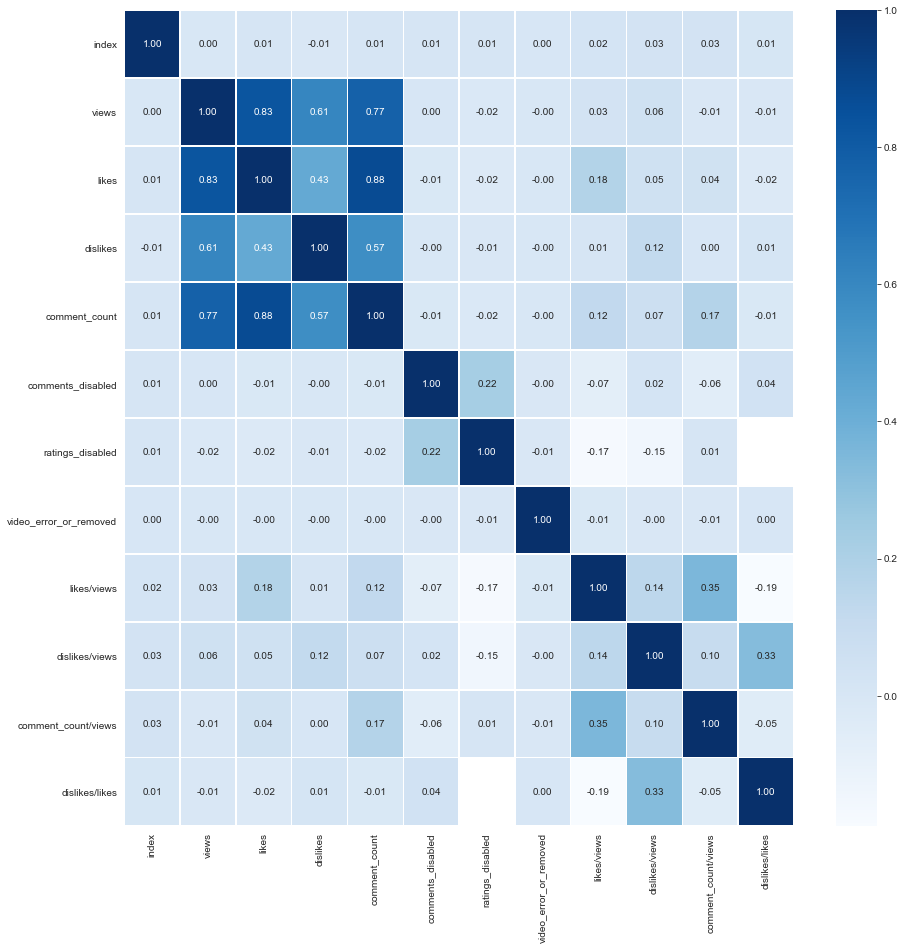

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    
plt.figure(figsize=(15,15))
sns.heatmap(data = KRvideos.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

likes(0.83), dislikes(0.61),comment_count(0.77)로
꽤 높은 상관관계를 가진다고 나타나지만 먼저 동영상을 조회해야 좋아요, 싫어요, 댓글을 남길 수 있기 때문에 좋아요수, 싫어요수, 댓글수가 조회수에 영향을 미친다기 보다는 조회수가 나머지 세개의 변수에 영향을 미친다고 해석할 수 있다. 나머지 변수들과는 별다른 상관관계를 보이지 않는다.

## 2-4. trending_date_wd별 조회수

<AxesSubplot:xlabel='trending_date_wd', ylabel='views'>

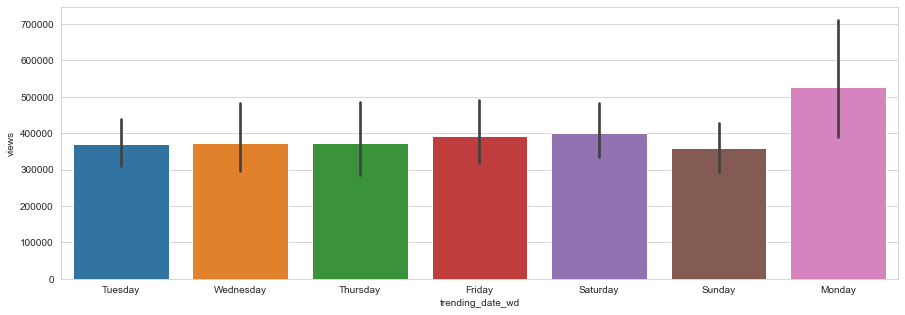

In [150]:
plt.figure(figsize=(15,5))
sns.barplot(data= KRvideos, x="trending_date_wd", y="views")

## 3. 최고 조회수를 찍은 영상과 그 채널의 평균 조회수를 비교


#### 1) 한국

In [154]:
dfKR = KRvideos
#채널별 영상 개수
pd.DataFrame(dfKR['channel_title'].value_counts()).reset_index()

,index,channel_title
0,도봉박홍기,153
1,신의한수,130
2,윤창중칼럼세상 TV,111
3,TV Derana,103
4,JTBC News,100
...,...,...
3521,Y Time 구독부탁해요,1
3522,B.S 골키퍼 Kim,1
3523,animax plus,1
3524,CARAT FILM,1


In [155]:
#채널별 조회수 평균
a_mean=pd.DataFrame(dfKR.groupby('channel_title')['views'].mean().reset_index())

In [156]:
a_mean = a_mean.rename({'channel_title':'channel_title','views':'view mean'},axis='columns')
a_mean

,channel_title,view mean
0,! 세상에 무슨일이,1.052789e+06
1,!t Live,6.489667e+04
2,# 정국적으로 뷔가내릴슈가,2.169800e+04
3,#Drama Planet,5.617000e+04
4,#tae_tae,1.224990e+05
...,...,...
3521,히히튜브,2.938900e+04
3522,힙합 스페이스 (HIPHOP SPACE),4.827550e+05
3523,힙합 좋아하는여자,2.173800e+04
3524,힙합버스,1.517325e+05


In [157]:
#채널별 최고 조회수
a=pd.DataFrame(dfKR.groupby('channel_title')['views'].max().reset_index())
a

,channel_title,views
0,! 세상에 무슨일이,1052789
1,!t Live,88705
2,# 정국적으로 뷔가내릴슈가,21698
3,#Drama Planet,86046
4,#tae_tae,122499
...,...,...
3521,히히튜브,29389
3522,힙합 스페이스 (HIPHOP SPACE),482755
3523,힙합 좋아하는여자,21738
3524,힙합버스,258028


In [158]:
a=a.sort_values(by='views',ascending = False).head(10)
a

,channel_title,views
1406,YouTube Spotlight,113876217
835,Marvel Entertainment,87450245
1535,ibighit,87430865
272,ChildishGambinoVEVO,73432600
1148,Sony Pictures Entertainment,49185287
1554,jypentertainment,42267579
222,Bruno Mars,37728802
707,Kylie Jenner,35832484
1256,TaylorSwiftVEVO,35218973
127,ArianaGrandeVevo,32331284


In [159]:
KR = pd.merge(a,a_mean, how="left", left_on="channel_title", right_on="channel_title")
KR

,channel_title,views,view mean
0,YouTube Spotlight,113876217,1.138762e+08
1,Marvel Entertainment,87450245,2.890868e+07
2,ibighit,87430865,2.346967e+07
3,ChildishGambinoVEVO,73432600,7.343260e+07
4,Sony Pictures Entertainment,49185287,2.295909e+07
5,jypentertainment,42267579,1.164332e+07
6,Bruno Mars,37728802,3.772880e+07
7,Kylie Jenner,35832484,3.583248e+07
8,TaylorSwiftVEVO,35218973,3.496372e+07
9,ArianaGrandeVevo,32331284,3.233128e+07


Text(0.5, 1.0, 'KR')

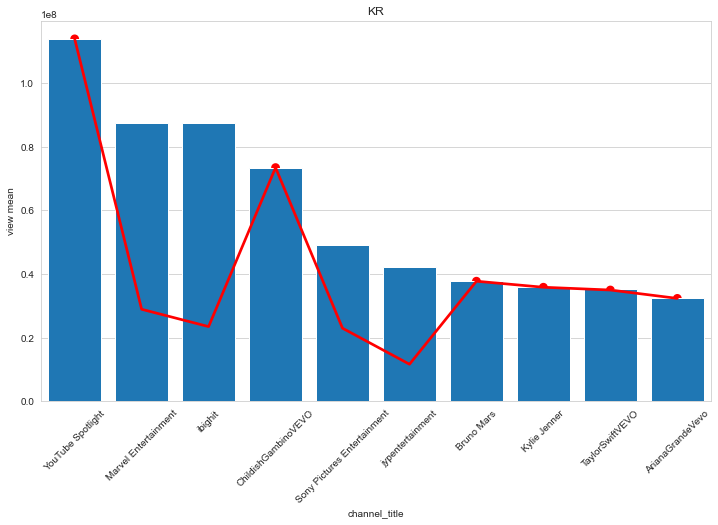

In [160]:
plt.figure(figsize=(12, 7))
plt.xticks(rotation=45)
plt.bar(x='channel_title', height='views',data=KR)
sns.pointplot(x="channel_title", y= "view mean",data=KR, color="red")
plt.title("KR")

파란 막대 그래프는 조회수가 가장 높은 영상 10개의 채널이고, 빨간 그래프는 그 채널 영상들의 조회수 평균이다. 한국에서 제일 조회수가 높은 10개의 채널 중에서 의외로 한국채널이 하나밖에 존재하지 않았다.(jypentertainment) 두 그래프 사이에 차이가 적으면 평균적으로 그 채널의 영상 조회수는 높고, 반대로 차이가 크면 한 영상이 대박을 쳤다고 결론을 내릴 수 있을 것이다. 이 그래프를 토대로 보면 YouTube Spotlight, ChildishGambinoVEVO, Bruno Mars, Kylie Jenner, TalyerSwiftVEVO, ArianaGrandeVevo의 영상은 대부분 조회수가 높고, 그 외 채널의 영상은 업로드 영상 중 일부만 한국에서 조회수가 높다는 것을 알 수 있다.



#### 2) 미국


In [164]:
dfUS=USvideos
#채널별 영상 개수
pd.DataFrame(dfUS['channel_title'].value_counts()).reset_index()

,index,channel_title
0,ESPN,84
1,TheEllenShow,74
2,The Tonight Show Starring Jimmy Fallon,72
3,Jimmy Kimmel Live,70
4,Netflix,58
...,...,...
2129,nothorwitzer,1
2130,XenonJohn,1
2131,ekaggrat singh kalsi,1
2132,Shyrynne,1


In [174]:
#채널별 조회수 평균
b_mean=pd.DataFrame(dfUS.groupby('channel_title')['views'].mean().reset_index())
b_mean = b_mean.rename({'channel_title':'channel_title','views':'view mean'},axis='columns')
b_mean

,channel_title,view mean
0,12 News,9.232700e+04
1,1MILLION Dance Studio,7.963550e+05
2,1theK (원더케이),2.740690e+06
3,20th Century Fox,6.661393e+06
4,2CELLOS,2.263170e+05
...,...,...
2129,ワーナー ブラザース 公式チャンネル,1.516682e+06
2130,圧倒的不審者の極み!,1.353109e+06
2131,杰威爾音樂 JVR Music,2.195764e+07
2132,郭韋辰,1.437000e+04


In [175]:
#채널별 최고 조회수
b=pd.DataFrame(dfUS.groupby('channel_title')['views'].max().reset_index())
b

,channel_title,views
0,12 News,92327
1,1MILLION Dance Studio,1000242
2,1theK (원더케이),7964424
3,20th Century Fox,24152049
4,2CELLOS,226317
...,...,...
2129,ワーナー ブラザース 公式チャンネル,1516682
2130,圧倒的不審者の極み!,1353109
2131,杰威爾音樂 JVR Music,21957640
2132,郭韋辰,14370


In [176]:
b=b.sort_values(by='views',ascending = False).head(10)
b

,channel_title,views
344,ChildishGambinoVEVO,225211923
1948,YouTube Spotlight,149376127
106,ArianaGrandeVevo,148689896
172,BeckyGVEVO,139334502
2026,ibighit,123010920
1763,TheWeekndVEVO,122544931
1032,LuisFonsiVEVO,102012605
311,Cardi B,94254507
1092,Marvel Entertainment,91933007
1072,MalumaVEVO,87264467


In [177]:
US = pd.merge(b,b_mean, how="left", left_on="channel_title", right_on="channel_title")
US

,channel_title,views,view mean
0,ChildishGambinoVEVO,225211923,2.252119e+08
1,YouTube Spotlight,149376127,5.051834e+07
2,ArianaGrandeVevo,148689896,5.091159e+07
3,BeckyGVEVO,139334502,1.393345e+08
4,ibighit,123010920,3.019482e+07
5,TheWeekndVEVO,122544931,1.225449e+08
6,LuisFonsiVEVO,102012605,1.020126e+08
7,Cardi B,94254507,5.589756e+07
8,Marvel Entertainment,91933007,1.276767e+07
9,MalumaVEVO,87264467,7.357084e+07


Text(0.5, 1.0, 'US')

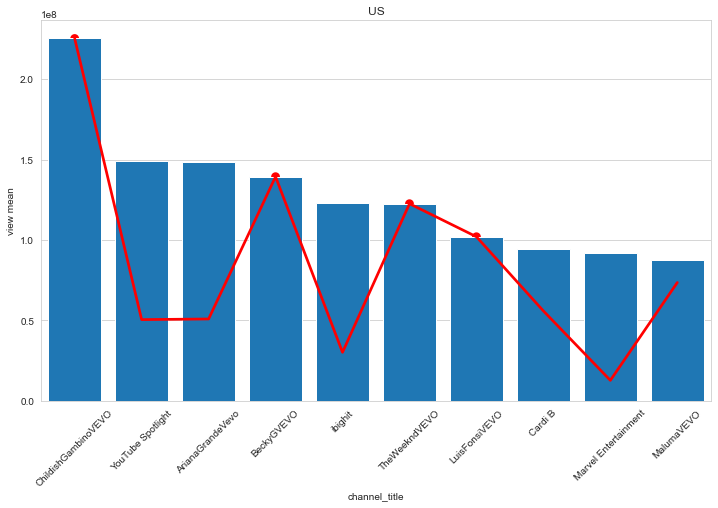

In [178]:
plt.figure(figsize=(12, 7))
plt.xticks(rotation=45)
plt.bar(x='channel_title', height='views',data=US)
sns.pointplot(x="channel_title", y= "view mean",data=US, color="red")
plt.title("US")

한국의 경우와 마찬가지로 파란 막대 그래프는 조회수가 가장 높은 영상 10개의 채널이고, 빨간 그래프는 그 채널 영상들의 조회수 평균이다. 미국의 경우는 ChildishGambinoVEVO, BeckyGVEVO, TheWeekndVEVO,LuisFonsiVEVO 채널의 영상들이 조회수가 높은 편이며 그 외 영상들은 일부의 영상만 조회수가 높다고 할 수 있다.

### 2. 한국과 미국의 영상 반응 정도 비교
반응 = 좋아요 수+ 싫어요 수+ 코멘트 수

In [180]:
dfKR=KRvideos
dfKR['reaction'] =KRvideos.likes+KRvideos.dislikes+KRvideos.comment_count 

In [181]:
dfUS=USvideos
dfUS['reaction'] =USvideos.likes+USvideos.dislikes+USvideos.comment_count 

Text(0.5, 1.0, 'Views VS Reactions in US')

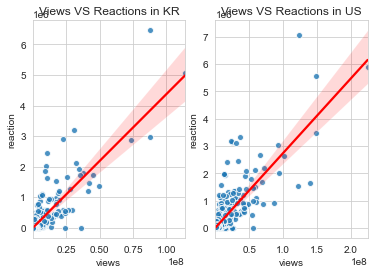

In [182]:
fig, ax = plt.subplots(ncols=2)

sns.regplot("views", "reaction", data=dfKR, ax=ax[0],line_kws={'color':"red"},scatter_kws={'edgecolor':"white"})
ax[0].set_title("Views VS Reactions in KR")
sns.regplot("views", "reaction", data=dfUS, ax=ax[1],line_kws={'color':"red"},scatter_kws={'edgecolor':"white"})
ax[1].set_title("Views VS Reactions in US")

조회수와 반응에 대한 관계를 봤을때, 미국에 비해 한국이 같은 조회수일때 반응(좋아요, 싫어요, 코멘트)을 더 많이 한다는 것을 알 수 있다.